##### import

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sources import Cfg
import nn_template.data_augmentation
import nn_template.model
import nn_template.datasets
from nn_template.model import Model
import nn_template.optuna

In [3]:
import matplotlib.pyplot as plt

### Load Dataset

In [4]:
cfg = Cfg.Parser('yaml-demos/demo.yaml').get_config()

In [5]:
train = cfg['datasets.train'].dataset()
validate = cfg['datasets.validate'].dataset()
test = cfg['datasets.test.DRIVE'].dataset()

In [12]:
%timeit train[1]
data = [train[1] for i in range(3)]

691 ms ± 10.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
plt.rcParams["figure.figsize"] = (25, 25)

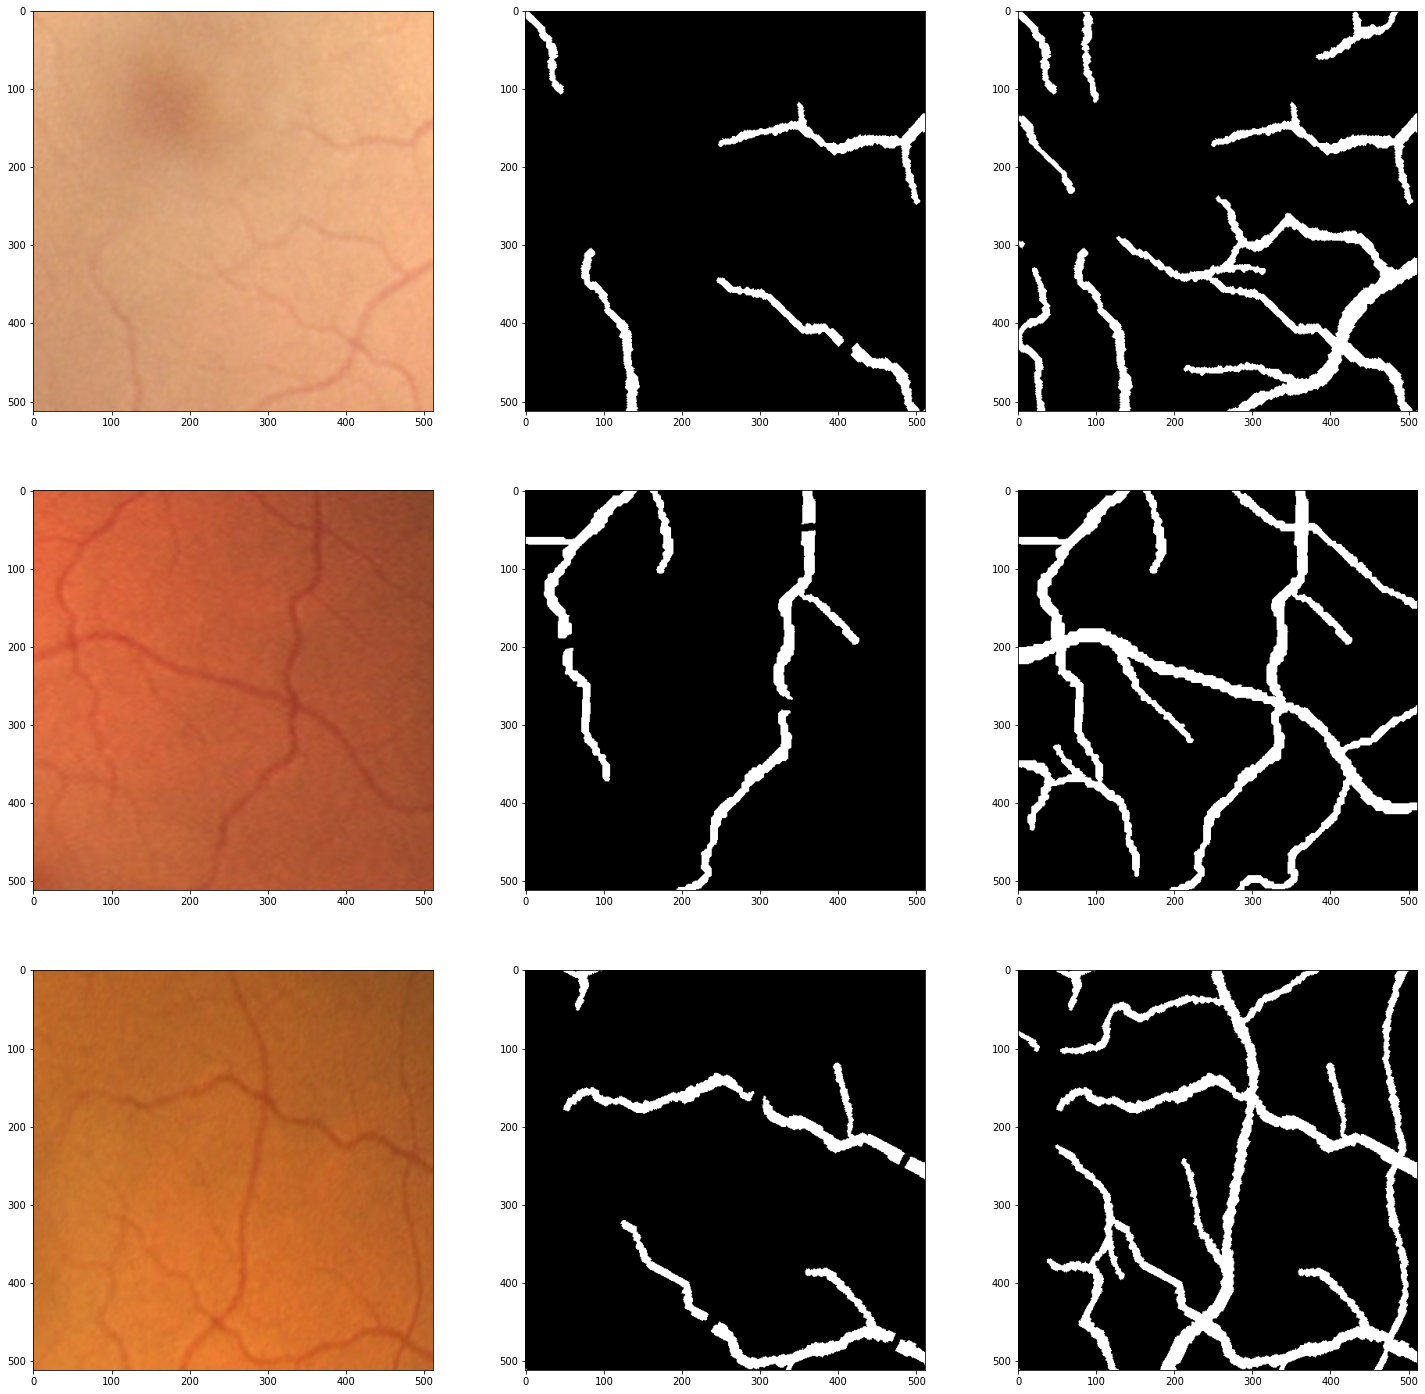

In [14]:
fig, axs = plt.subplots(len(data),3)
for i, d in enumerate(data):
    axs[i, 0].imshow(d['x'].permute((1,2,0)).flip(2))
    axs[i, 1].imshow(d['y'], cmap='gray', vmax=1)
    axs[i, 2].imshow(d['mask'], cmap='gray')